3.13  For a large uniformly illuminated rectangular aperture antenna find,

(a) Directivity

$$ D=\frac{4\pi}{\lambda^2}A_p $$

In [1]:
import numpy as np

f = 2.4e9                       # operating frequency in Hz
lam = 3e8/f                     # wavelength in meters
Ap = 0.5*0.5                    # aperture area in square meters
D = 4*np.pi*Ap/lam**2           # directivity
print("Directivity: ", D)       # print directivity
print("DdB: ", 10*np.log10(D))  # print directivity in dB

Directivity:  201.06192982974676
DdB:  23.033298466780213


(b) Aperture efficiency (the ratio of the antenna directivity and the standard directivity equation 1.10)

$$ \eta_{eff}=\frac{D}{D_{std}} $$

Since the antenna is a large uniform rectangular antenna $D=D_{std}$ giving $\eta_{eff}=100\%$

(c) radiation pattern

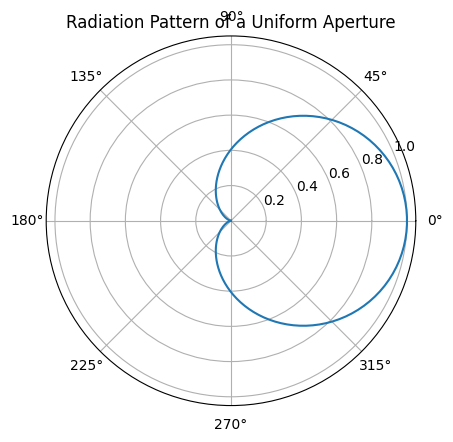

In [2]:
import matplotlib.pyplot as plt

theta = np.linspace(-1*np.pi, np.pi, 150)               # theta from -pi to pi
E = np.sinc(theta/np.pi)**2                             # Electric field calculation

# plot the radiation pattern
plt.polar(theta, E)
plt.title('Radiation Pattern of a Uniform Aperture')
plt.show()

3.14
(a) What is the radiation pattern for a dominant mode horn antenna

$$ \phi=0, 180 $$         
$$ E_\phi~cos\theta \frac{cos(k_x a/2)}{\pi^2 - (k_x a)^2} $$
$$ \phi=90, 270 $$        
$$ E_\phi~\frac{sin(k_y b/2)}{k_y b/2} $$

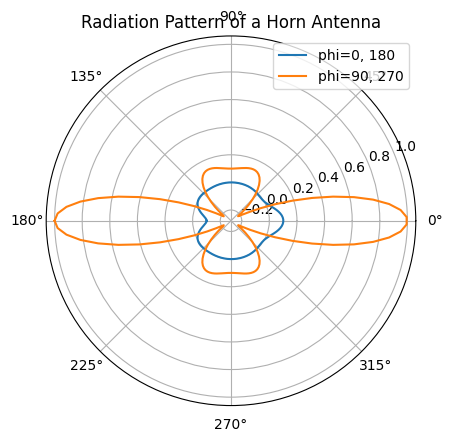

In [3]:
lam = 3e8/2.4e9                                                     # wavelength in meters
k = 2*np.pi / lam                                                   # wave number                      
phi = [0, 90]                                                       # phi values       
kx = k*np.sin(theta)*np.cos(phi[0])                                 # kx calculation
ky = k*np.sin(theta)*np.sin(phi[1])                                 # ky calculation
a = 3*lam                                                           # aperture size                                                     
b = 2*lam                                                           # aperture size                                        
theta = np.linspace(-1*np.pi, np.pi, 150)                           # theta from -pi to pi                         
E_phi_1 = np.cos(theta)*np.cos(kx*a/2) / (np.pi**2 - (kx*a)**2)     # E field calculation
E_phi_2 = np.sin(ky*a/2) / (ky*a/2)                                 # E field calculation

# plot the radiation pattern
plt.polar(theta,E_phi_1,label='phi=0, 180')
plt.polar(theta,E_phi_2,label='phi=90, 270')
plt.legend()
plt.title('Radiation Pattern of a Horn Antenna')
plt.show()

(b) Plot the directivity as a function of frequency. In the same plot show the gain foor 100% efficiency $(4\pi ab/\lambda^2)$.

Directivity is given as:

$$ D = \frac{8}{\pi^2}\frac{4*\pi}{\lambda^2}ab $$

And gain is:

$$ G=\eta D $$

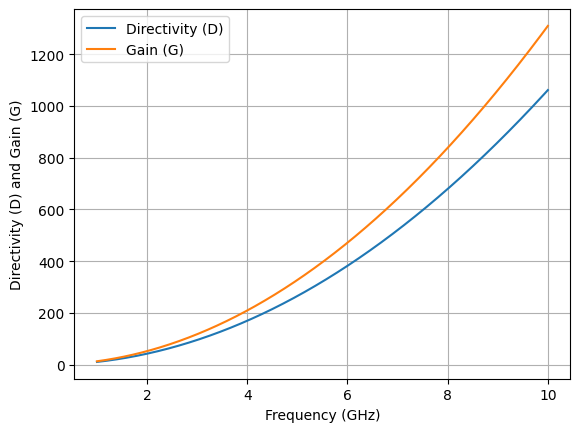

In [4]:
f = np.linspace(1e9, 10e9, 1000)        # frequency range in Hz
lam = 3e8/f                             # wavelength in meters
D = a*b*8*4*np.pi / (lam**2*np.pi**2)   # directivity
G = 4*np.pi*a*b / (lam**2)              # gain

# plot the directivity and gain
plt.plot(f/1e9, D, label='Directivity (D)')
plt.plot(f/1e9, G, label='Gain (G)')
plt.legend()
plt.xlabel('Frequency (GHz)')
plt.ylabel('Directivity (D) and Gain (G)')
plt.grid()
plt.show()


3.15 For uniformly illuminated circular aperture antenna

(a) Radiation pattern

To get the radiation pattern of a circular aperture antenna the jinc function is used which uses the 

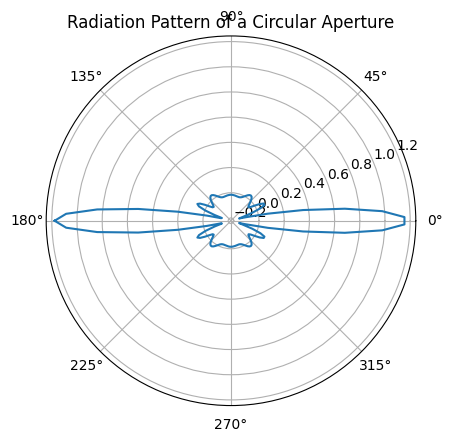

In [5]:
# use the jinc function
from scipy.special import j1

# bessel function of the first kind
J = j1(k*a*np.sin(theta))

# electric field
E = 2*np.pi*a*J/(k*a*np.sin(theta))

# plot the radiation pattern
plt.polar(theta, E)
plt.title('Radiation Pattern of a Circular Aperture')
plt.show()

(b) Directivity

$$ D = \frac{4\pi}{\lambda^2}A_p $$

Where $A_p=\pi a^2$

In [6]:
f = 2.4e9
lam = 3e8/f         
Ap_circle = np.pi*a**2                  # aperture area in square meters
D_circle = 4*np.pi*Ap_circle/lam**2     # directivity

# print the directivity
print("Directivity: ", D_circle)
print("DdB: ", 10*np.log10(D_circle))

Directivity:  355.3057584392169
DdB:  25.506022461555553


(c) Effective area, which is given by

$$ A_{eff} = A_p * \eta_{eff} $$

where $\eta_{eff}$ is the radiation efficiency. Because the aperture is uniformly illuminated the efficiency is 100%. This means the effective area is $$ A_{eff} = A_p = \pi a^2 $$.

(d) Aperture efficiency is given in part (c)

(e) Approximation for the null-to-null beamwidth. The null-to-null beamwidth is given by integrating the bessel function.

$$ \int_0^a J_0 (bx)xdx=\frac{a}{b}J_1 (ab) $$

Where $a=1$ and $b=ka*sin\theta$.This gives the equation

$$ \frac{J(ka*sin\theta)}{ka*sin\theta}$$

Set $ka*sin\theta=x$ and we define each null point to be $$ \theta_{nn}=\frac{2x_1}{ka} $$

In [7]:
# calculate the null-to-null beamwidth
theta_nn = 2/(k*a)
print("Null-to-null beamwidth (radians): ", theta_nn)

Null-to-null beamwidth (radians):  0.1061032953945969


3.16 Design the diameter of a circular aperture feed for a satellite downlink application with a 10dB edge taper at the dish rim at a frequenncy of 12GHz. The reflector   diameter is 70cm and f/D=0.6

In [9]:
from PIL import Image

# Open the image file
img = Image.open('3-16-work.png')

# Display the image
img.show()

# calculations
freq = 12e9                                 # frequency in Hz
lam = 3e8/freq                              # wavelength in meters
diameter_ref = 70e-2                         # reflector diameter in meters
f_d = 0.6                                   # f/d ratio
f = diameter_ref*f_d                        # focal length in meters
theta_10db = 2*np.arctan(diameter_ref/2/f)  # 10 dB beamwidth in radians
d = 70*lam/(2*theta_10db)                   # feed diameter in meters

# print feed diameter
print("Feed diameter: ", d)

Feed diameter:  0.6297335485746713
